# EDA SINIESTROS VIALES

In [1]:
# Importamos las librerias que se utilizaran 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

----------------------------------------------------------------------------------------------------------

### Se utilizara datos sin transformar para dar una breve introduccion a la clase de datos que nos vamos a encontrar dentro de los xlsx
### Posteriormente se hara el uso de datos con las transformaciones ya realizadas

In [65]:
hechos = pd.read_csv('datasets\hechos3.csv')
hechos.head(5) 

,id_hecho,n_victimas,fecha,hora,hh,tipo_calle,comuna,longitud,latitud,participantes,victima,acusado
0,2016-0001,1,2016-01-01,04:00:00,4.0,AVENIDA,8.0,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,01:15:00,1.0,GRAL PAZ,9.0,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,07:00:00,7.0,AVENIDA,1.0,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0005,1,2016-01-21,05:20:00,5.0,AVENIDA,1.0,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS
4,2016-0008,1,2016-01-24,18:30:00,18.0,AVENIDA,8.0,-58.444513,-34.684759,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO


In [66]:
victimas = pd.read_csv('datasets/victimas3.csv')
victimas.head(5)

,id_hecho,fecha,rol_victima,vehiculo_victima,sexo_victima,edad_victima
0,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19.0
1,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70.0
2,2016-0003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30.0
3,2016-0004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18.0
4,2016-0005,2016-01-21,CONDUCTOR,MOTO,MASCULINO,29.0


In [94]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_hecho       659 non-null    object        
 1   n_victimas     659 non-null    int64         
 2   fecha          659 non-null    datetime64[ns]
 3   hora           659 non-null    object        
 4   hh             659 non-null    float64       
 5   tipo_calle     659 non-null    object        
 6   comuna         659 non-null    float64       
 7   longitud       659 non-null    float64       
 8   latitud        659 non-null    float64       
 9   participantes  659 non-null    object        
 10  victima        659 non-null    object        
 11  acusado        659 non-null    object        
 12  año            659 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(6)
memory usage: 64.5+ KB


In [95]:
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_hecho          658 non-null    object 
 1   fecha             658 non-null    object 
 2   rol_victima       658 non-null    object 
 3   vehiculo_victima  658 non-null    object 
 4   sexo_victima      658 non-null    object 
 5   edad_victima      658 non-null    float64
dtypes: float64(1), object(5)
memory usage: 31.0+ KB


## Revisamos cuantos valores nulos tiene cada dataframe

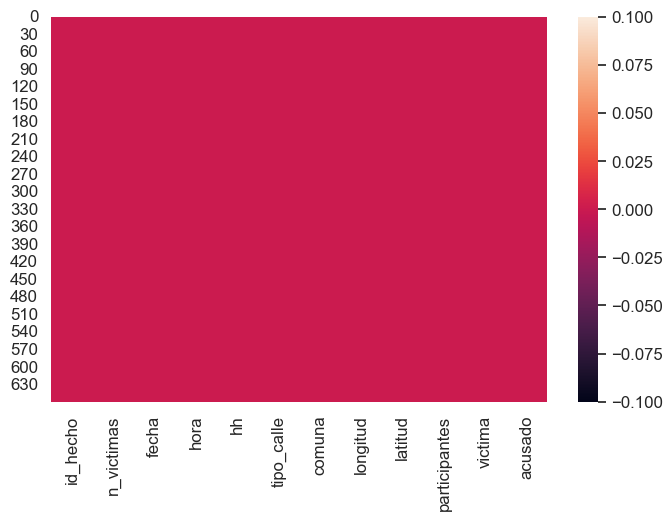

In [67]:
# Revisamos si dentro del df de hechos hay valores nulos
sns.heatmap(hechos.isnull())
plt.show()

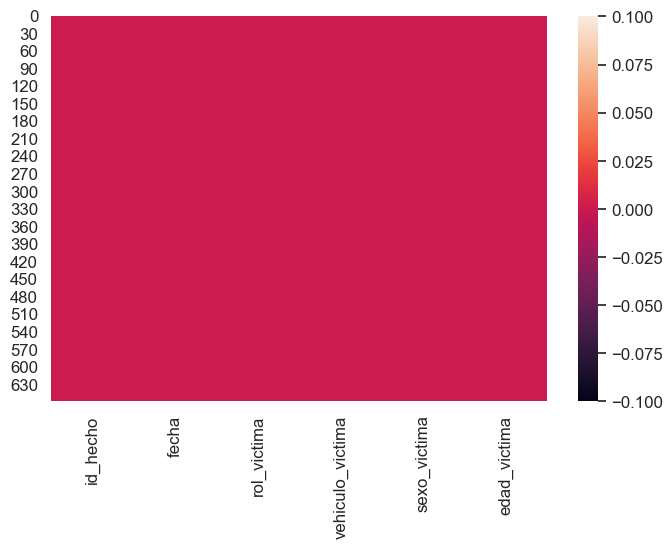

In [68]:
# Procedemos a hacer el mismo analisis con el df de victimas 
sns.heatmap(victimas.isnull())
plt.show()

* Como se puede observar este df esta sin valores nulos 

### FILAS DE DUPLICADAS

In [69]:
duplicados_hechos = hechos.duplicated().sum()
print("Cantidad de duplicados en el dataframe 'hechos':", duplicados_hechos)

duplicados_victimas = victimas.duplicated().sum()
print("Cantidad de duplicados en el dataframe 'victimas':", duplicados_victimas)

Cantidad de duplicados en el dataframe 'hechos': 0
Cantidad de duplicados en el dataframe 'victimas': 0


### NUBE DE PALABRAS

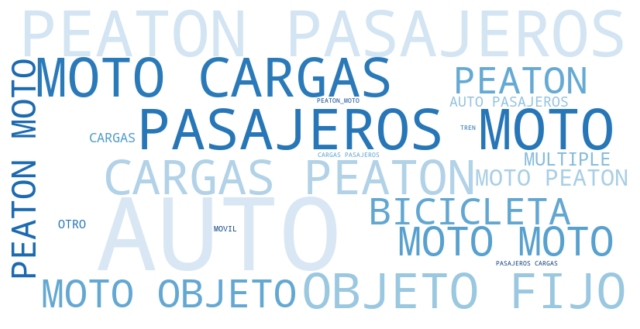

In [70]:
# Selecciona las columnas 'victima' y 'acusado'
nube = hechos[['victima', 'acusado']]

# Combina los textos de ambas columnas en una sola cadena
texto = ' '.join(nube.fillna('').astype(str).values.flatten())

# Genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(texto)

# Mostrar la nube de palabras utilizando Matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### HISTOGRAMA

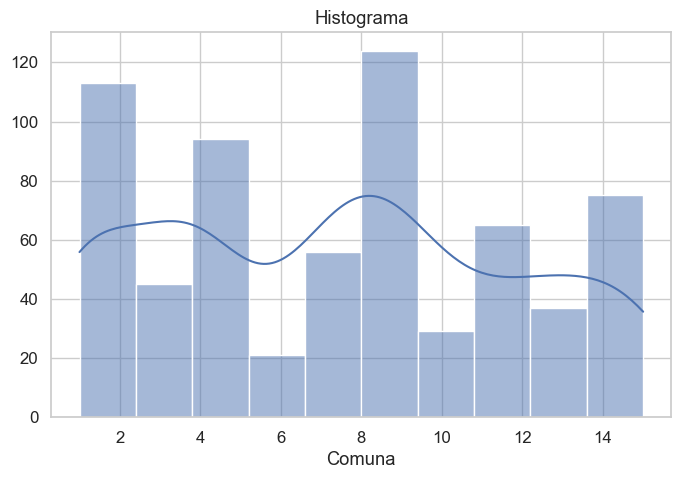

In [71]:
sns.histplot(hechos['comuna'], bins=10, kde=True)
plt.xlabel("Comuna")
plt.ylabel('')
plt.title('Histograma')
plt.show()

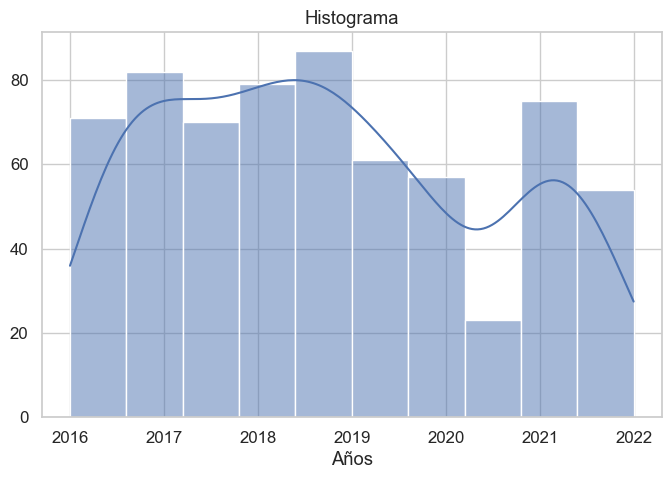

In [92]:
sns.histplot(hechos['fecha'], bins=10, kde=True)
plt.xlabel("Años")
plt.ylabel('')
plt.title('Histograma')
plt.xlim()
plt.show()

### RANGO ETARIO

In [74]:
victimas['edad_victima'].min()

1.0

In [75]:
top_victimas = victimas['edad_victima'].value_counts().nlargest(20)
top_victimas.head(20)

edad_victima
30.0    28
29.0    24
23.0    23
28.0    20
27.0    20
24.0    18
21.0    17
39.0    16
20.0    16
32.0    16
26.0    15
35.0    15
60.0    15
22.0    14
36.0    14
41.0    13
25.0    13
43.0    13
37.0    13
73.0    11
Name: count, dtype: int64

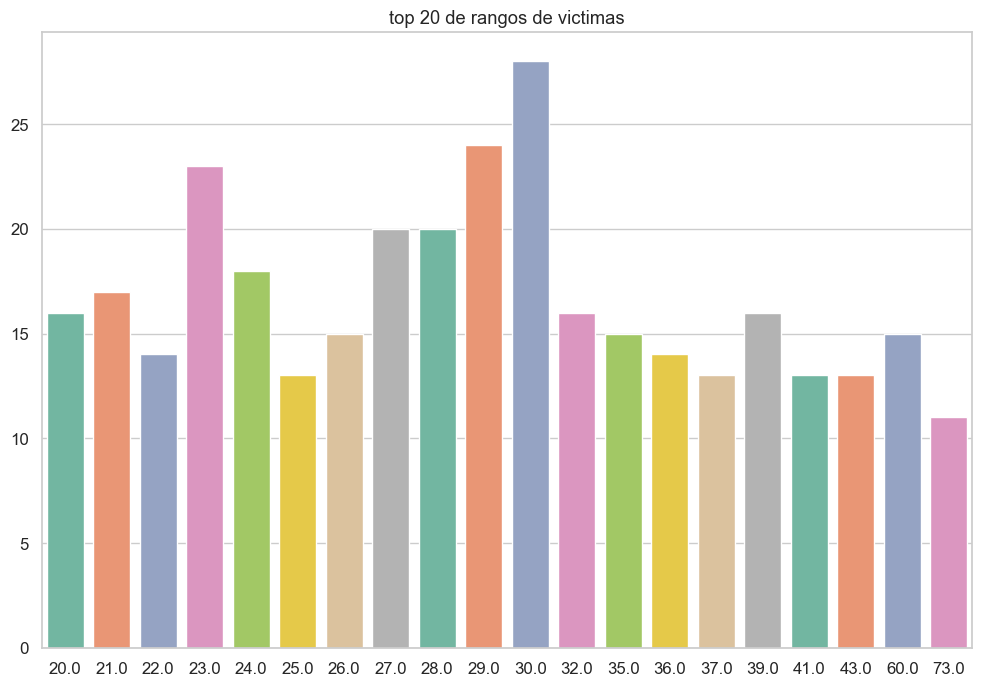

In [91]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_victimas.values, x=top_victimas.index, palette="Set2")
plt.xlabel('')
plt.ylabel('')
plt.title('top 20 de rangos de victimas')
plt.show()

In [77]:
victimas['edad_victima'] = pd.to_numeric(victimas['edad_victima'], errors='coerce')

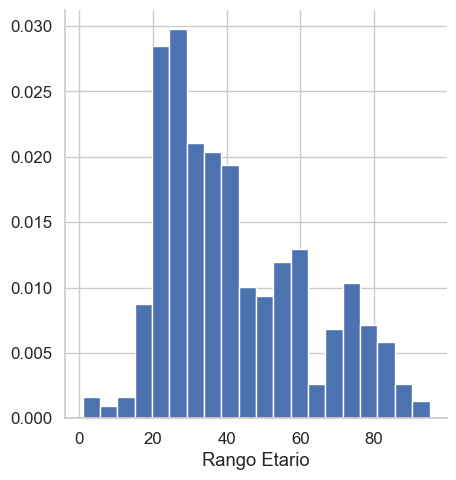

In [78]:
sns.set(style='whitegrid', palette='deep', font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.displot(
    data=victimas,
    x='edad_victima',
    bins=20,
    kde=False,
    alpha=1,  # Esto establece la transparencia directamente
    stat='density'  # Cambia 'density' a 'count' si prefieres mostrar el conteo
).set(xlabel='Rango Etario', ylabel='')  # O cambia a 'Count' si usas 'stat=count'

plt.show()

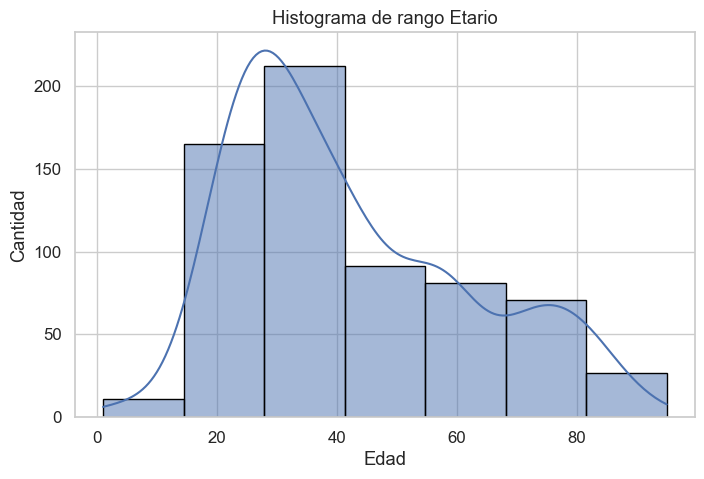

In [79]:
# Sacamos el rango Etario:
sns.set_style('whitegrid')

#Crear el histograma
sns.histplot(victimas['edad_victima'], bins=7, kde=True, edgecolor= 'black', palette="Set2")

#Añadir título y etiquetas
plt.title("Histograma de rango Etario")
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()

* Gracias a este grafico puedo identificar que no contamos con datos sobre la edad de las victimas de accidentes viales


### Gráfico de dispersión

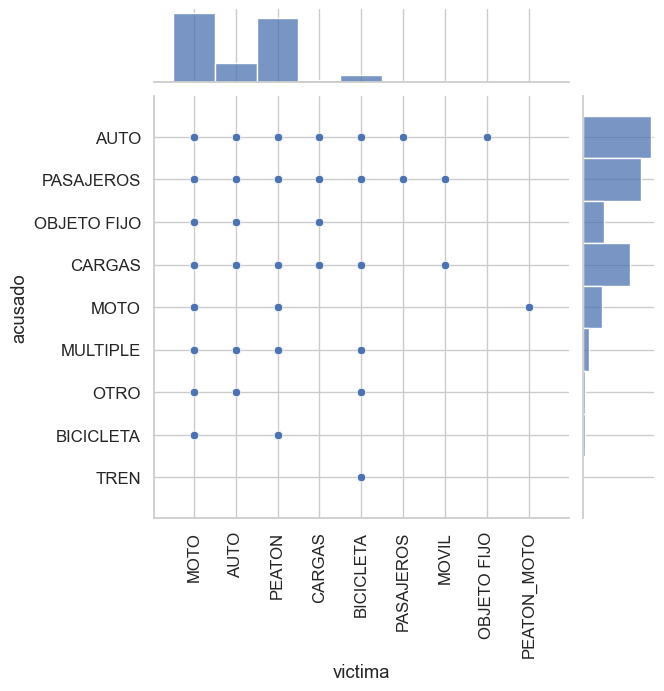

In [80]:
g = sns.jointplot(x='victima', y='acusado', data=hechos)

# Rotar las etiquetas del eje x
g.ax_joint.set_xticklabels(g.ax_joint.get_xticklabels(), rotation=90)

# Mostrar el gráfico
plt.show()

In [81]:
hechos.columns

Index(['id_hecho', 'n_victimas', 'fecha', 'hora', 'hh', 'tipo_calle', 'comuna',
       'longitud', 'latitud', 'participantes', 'victima', 'acusado'],
      dtype='object')

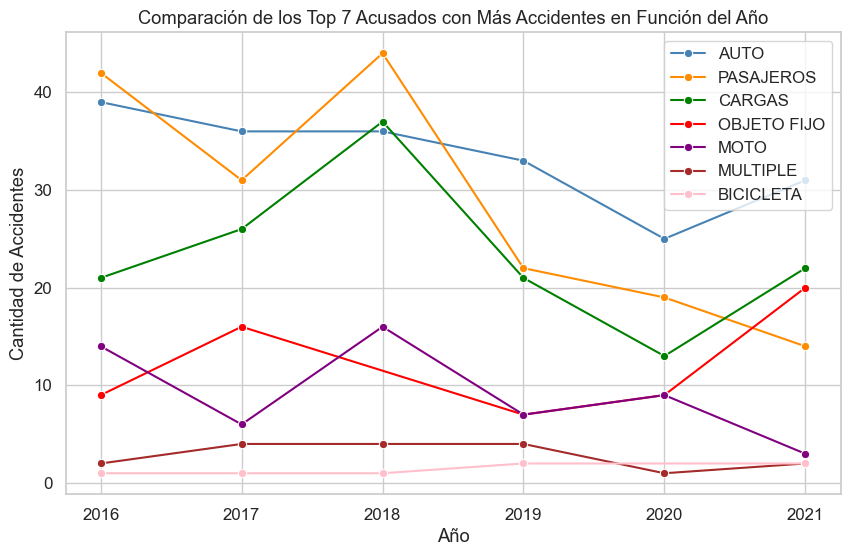

In [82]:
# Convierte 'fecha' en formato datetime.
hechos['fecha'] = pd.to_datetime(hechos['fecha'])

# Agregar una columna 'año' para extraer el año de la fecha
hechos['año'] = hechos['fecha'].dt.year

# Contar la cantidad de accidentes por tipo de acusado y año
accidentes_por_acusado_y_año = hechos.groupby(['acusado', 'año']).size().reset_index(name='cantidad_accidentes')

# Seleccionar los 10 tipos de acusados con más accidentes
top_7_acusados = accidentes_por_acusado_y_año.groupby('acusado')['cantidad_accidentes'].sum().nlargest(7).index

# Crear un lineplot para comparar la cantidad de accidentes por acusado en función del año
plt.figure(figsize=(10, 6))

# Lista de colores para trazar las líneas
colores = ['steelblue', 'darkorange', 'green', 'red', 'purple', 'brown', 'pink']

for acusado, color in zip(top_7_acusados, colores):
    subset = accidentes_por_acusado_y_año[accidentes_por_acusado_y_año['acusado'] == acusado]
    sns.lineplot(data=subset, x='año', y='cantidad_accidentes', label=acusado, marker='o', color=color)

plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.title('Comparación de los Top 7 Acusados con Más Accidentes en Función del Año')
plt.legend(loc='upper right')
plt.show()


### Conseguimos los 20 tipos de accidentes más concurrentes

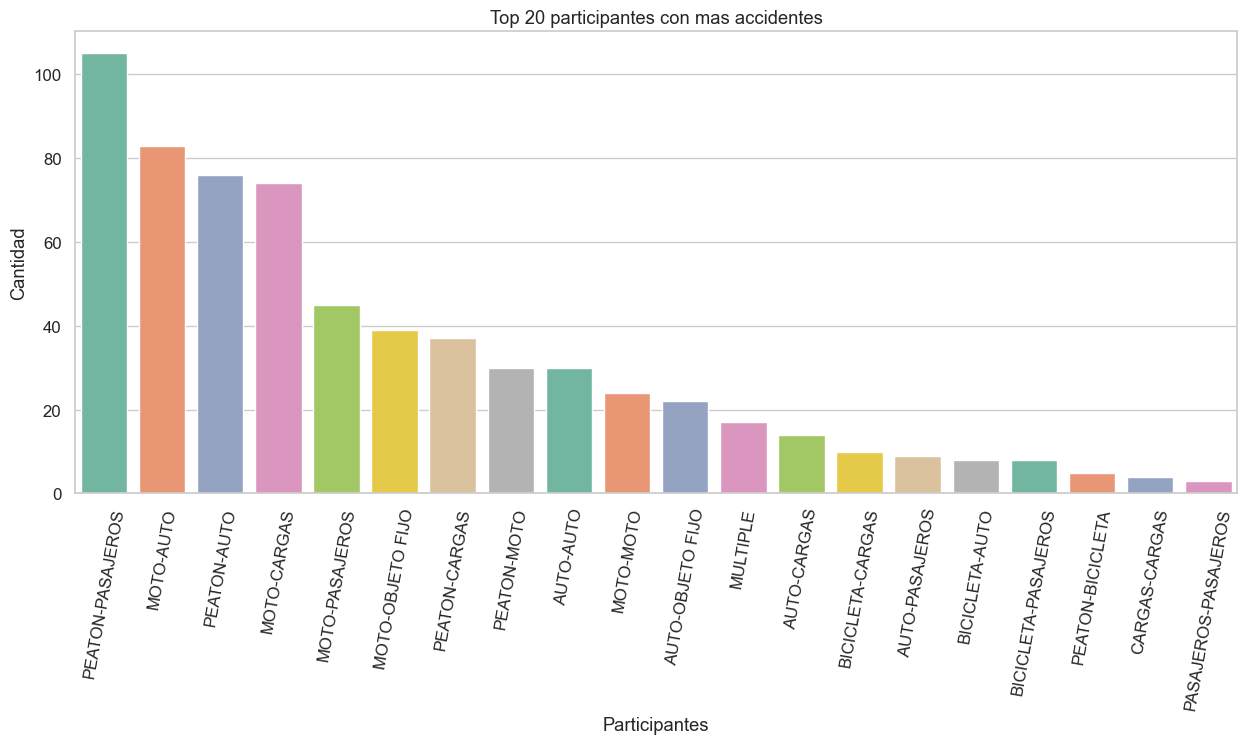

In [83]:
# Obtener los 20 participantes que más aparecen excluyendo NaN
top_20 = hechos['participantes'].value_counts().head(20)

# Crear un gráfico de barras
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=top_20.index, y=top_20.values, palette="Set2")
ax.set_title('Top 20 participantes con mas accidentes')
ax.set_xlabel('Participantes')
ax.set_ylabel('Cantidad')

# Rotar las etiquetas del eje X para una mejor legibilidad
plt.xticks(rotation=80)

plt.show()

In [84]:
top_participantes = hechos['participantes'].value_counts().nlargest(20)
top_participantes.head(20)

participantes
PEATON-PASAJEROS       105
MOTO-AUTO               83
PEATON-AUTO             76
MOTO-CARGAS             74
MOTO-PASAJEROS          45
MOTO-OBJETO FIJO        39
PEATON-CARGAS           37
PEATON-MOTO             30
AUTO-AUTO               30
MOTO-MOTO               24
AUTO-OBJETO FIJO        22
MULTIPLE                17
AUTO-CARGAS             14
BICICLETA-CARGAS        10
AUTO-PASAJEROS           9
BICICLETA-AUTO           8
BICICLETA-PASAJEROS      8
PEATON-BICICLETA         5
CARGAS-CARGAS            4
PASAJEROS-PASAJEROS      3
Name: count, dtype: int64

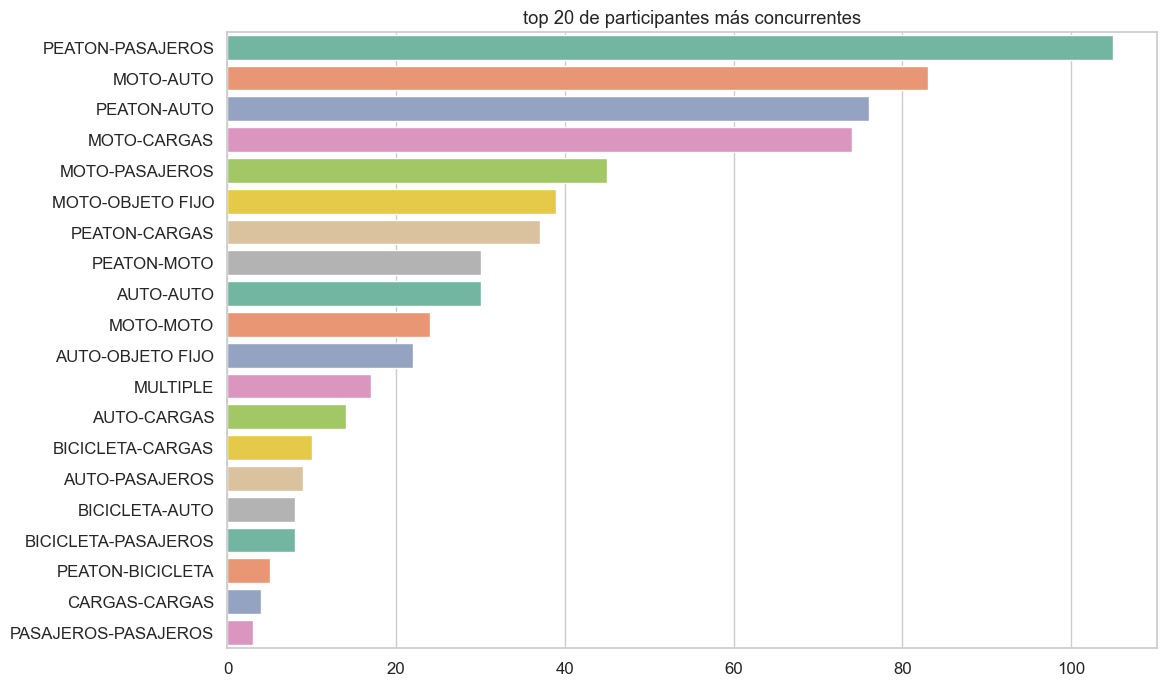

In [85]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_participantes.index, x=top_participantes.values, palette="Set2")
plt.xlabel('')
plt.ylabel('')
plt.title('top 20 de participantes más concurrentes')
plt.show()

### ACCIDENTES POR DIA/MES

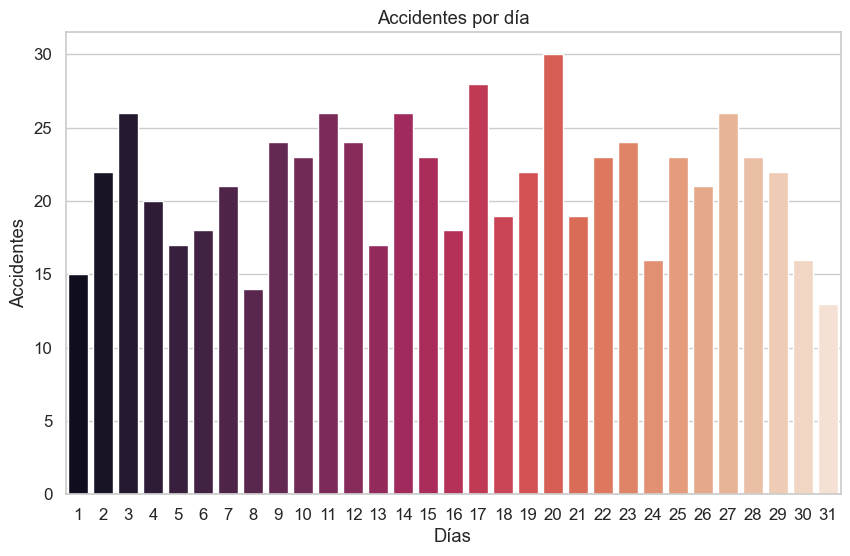

In [86]:
# Cuenta la frecuencia de cada día en la columna
day_counts = hechos['fecha'].dt.day.value_counts().sort_index()

# Nombres de los día en formato corto
dias = list(range(1,32))

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=dias, y=day_counts, palette="rocket")
ax.set_title('Accidentes por día')
ax.set_xlabel('Días')
ax.set_ylabel('Accidentes')

plt.show()

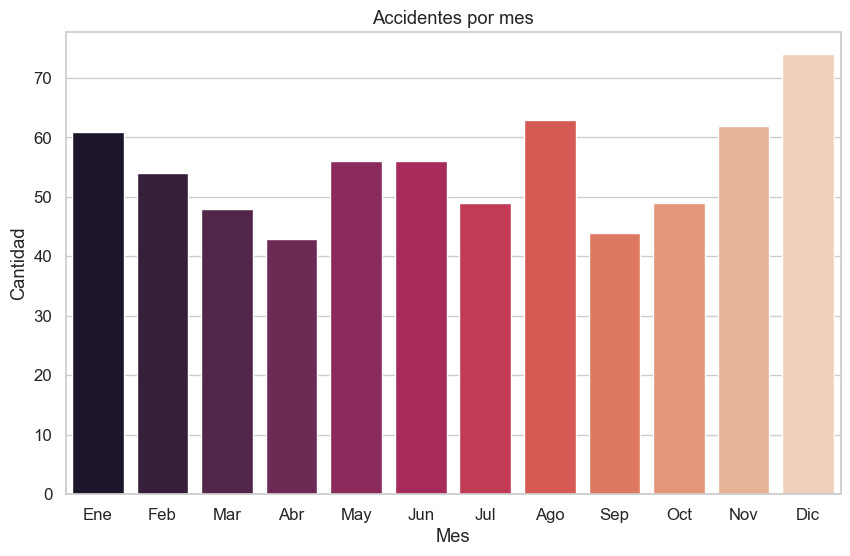

In [87]:
# Cuenta la frecuencia de cada mes en la columna
month_counts = hechos['fecha'].dt.month.value_counts().sort_index()

# Nombres de los meses en formato corto
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=meses, y=month_counts, palette="rocket")
ax.set_title('Accidentes por mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad')

plt.show()

### Distribucion de genero

In [88]:
victimas.columns

Index(['id_hecho', 'fecha', 'rol_victima', 'vehiculo_victima', 'sexo_victima',
       'edad_victima'],
      dtype='object')

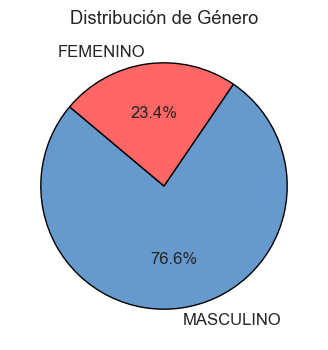

In [89]:
conteo_genero = victimas['sexo_victima'].value_counts()

plt.figure(figsize=(4,4))

colores = ['#6699CC', '#FF6666', '#66CC66']


plt.pie(conteo_genero, labels=conteo_genero.index, autopct='%1.1f%%', wedgeprops={"linewidth": 1, "edgecolor": "black"}, startangle=140, colors=colores, textprops={'fontsize': 12})

# Añadir título
plt.title('Distribución de Género')

# Mostrar el diagrama de pastel
plt.show()

---------------------------
-----------------------------------------------------------------------------------------------------------------